<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [45]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


**Task 1**: Become familiar with the dataset

I will check if the dataset contains the expected variables:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [46]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The first column is unnamed and just contains numerical indexes, so the first step is to drop it

In [47]:
boston_df = boston_df.drop(columns = 'Unnamed: 0')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [79]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Task 2**: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot


<Axes: title={'center': 'Boxplot of Median value of owner-occupier homes (MEDV)'}, xlabel='MEDV'>

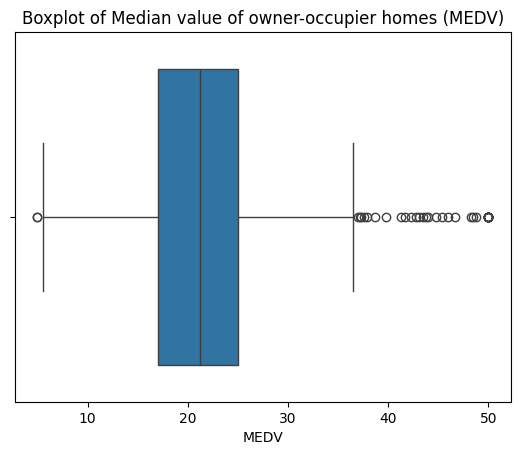

In [ ]:
ax = sns.boxplot(data = boston_df, x = 'MEDV')
ax.set(xlabel='MEDV', title = 'Boxplot of Median value of owner-occupier homes (MEDV)')
ax

- Provide a  bar plot for the Charles river variable


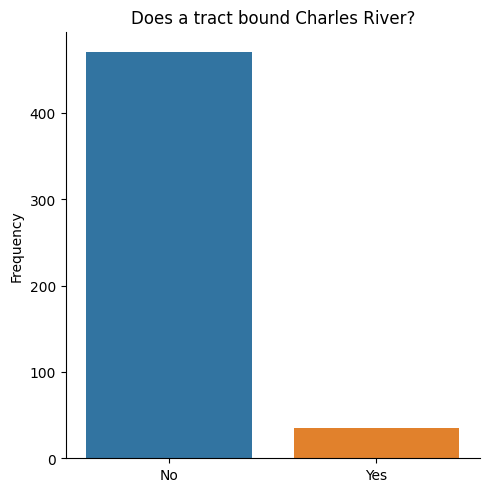

In [103]:
CHAS_string = boston_df[['CHAS']].copy()
CHAS_string['CHAS'] = CHAS_string['CHAS'].map({0: 'No', 1: 'Yes'})
ax = sns.catplot(x='CHAS', hue = 'CHAS', kind='count', data=CHAS_string)
ax.set(xlabel='', title = 'Does a tract bound Charles River?', ylabel = 'Frequency')
ax

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [53]:
boston_df.loc[boston_df['AGE'] <= 35,'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70),'AGE_GROUP'] = 'Between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70,'AGE_GROUP'] = '70 years and older'

[Text(0.5, 0, 'MEDV'),
 Text(0, 0.5, 'Age group'),
 Text(0.5, 1.0, 'Boxplot of Median value of owner-occupier homes (MEDV) per age groups')]

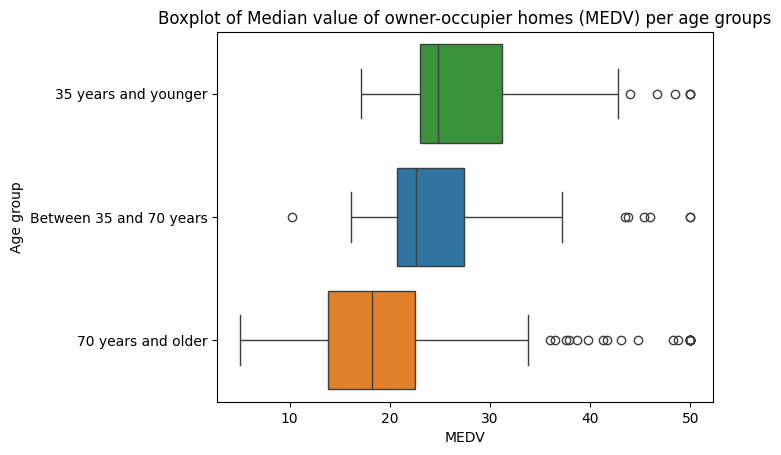

In [74]:
ax = sns.boxplot(data = boston_df, x = 'MEDV', y = 'AGE_GROUP', hue='AGE_GROUP',
                 order=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])
ax.set(xlabel='MEDV', 
       ylabel = 'Age group',
       title = 'Boxplot of Median value of owner-occupier homes (MEDV) per age groups')


- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

[Text(0.5, 0, 'NOX'),
 Text(0, 0.5, 'INDUS (%)'),
 Text(0.5, 1.0, 'Relationship between Nitric oxide concentration (NOX) and \n the proportion of non-retail business acres per town (INDUS)')]

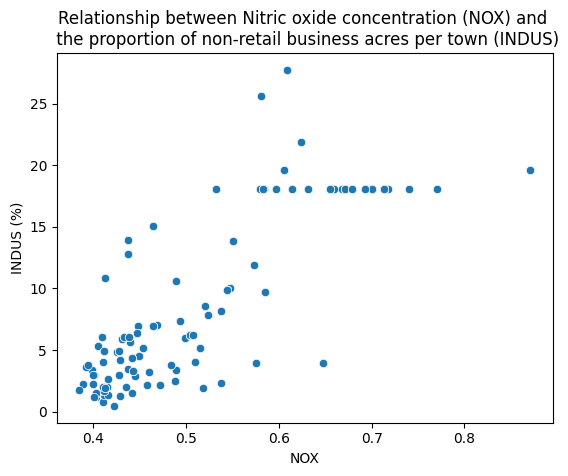

In [81]:
ax = sns.scatterplot(data = boston_df, x = 'NOX', y = 'INDUS')
ax.set(xlabel='NOX', 
       ylabel = 'INDUS (%)',
       title = 'Relationship between Nitric oxide concentration (NOX) and \n the proportion of non-retail business acres per town (INDUS)')


Based on the scatter plot, and for Nitric oxide concentration (NOX) values lower than 0.7 it seems to be a positive relationship between these two variables which means that an increase (decrease) on one of them (i.e INDUS) is correlated with an increase (decrease) of the other variable (i.e NOX). For NOX values higher than 0.7, there is not a clear relationship with the INDUS variable values. 

- Create a histogram for the pupil to teacher ratio variable

<Axes: title={'center': 'Histogram of pupil-teacher ratio by town (P-T RATIO)'}, xlabel='P-T RATIO', ylabel='Frequency'>

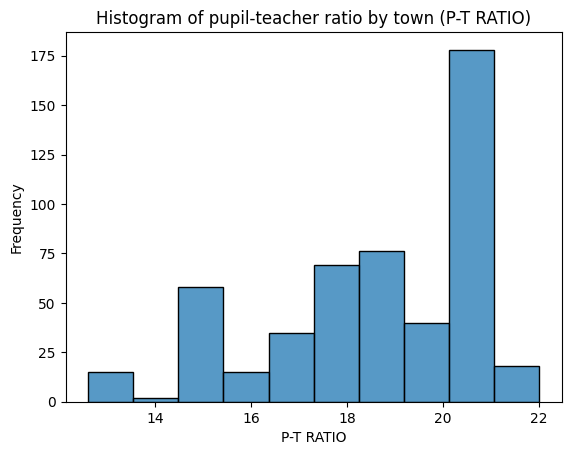

In [102]:
ax = sns.histplot(data = boston_df, x = 'PTRATIO', bins = 10)
ax.set(xlabel='P-T RATIO', title = 'Histogram of pupil-teacher ratio by town (P-T RATIO)', 
       ylabel = 'Frequency')
ax

**Task 3:** Use the appropriate tests to answer the questions provided.

For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles River or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)

Be sure to:

1. State your hypothesis.

2. Use α = 0.05

3. Perform the test Statistics.

4. State the conclusion from the test.

*- Question 1*: Is there a significant difference in median value of houses bounded by the Charles River or not? (T-test for independent samples)

We will assume we have independent samples from a random variable $X$: *Median value of houses* from two populations:
- 1: Houses bounded by the Charles River
- 2: Houses not bounded by the Charles River

Then $X_1$ and $X_2$ represent the random variable $X$ in these populations, with expected values $\mu_1$ and $\mu_2$ respectively.



[Text(0.5, 0, 'Distribution of MEDV'), Text(0, 0.5, 'Frequency')]

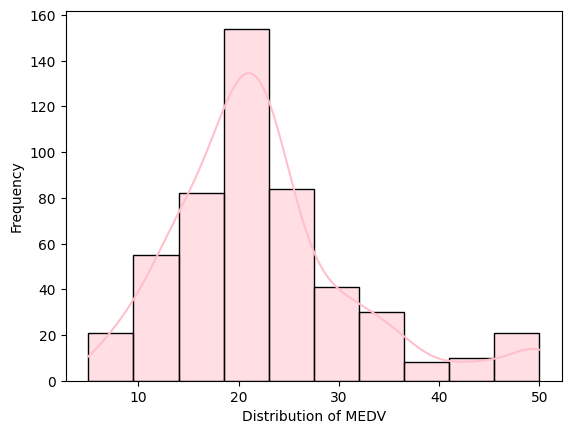

In [106]:
# Distribution of MEDV
ax = sns.histplot(data= boston_df,
                  x = 'MEDV',
                  bins=10,
                  kde=True,
                  color = 'pink')
ax.set(xlabel='Distribution of MEDV', ylabel='Frequency')
## we can assume it is normal

Based on the boxplot displayed in the *Task 2* and in the histogram shown above, we can assume that $X \sim N(\mu, \sigma)$

Since we have a random sample from this random variable in the two populations described above, we can use a statistical test for evaluating if there is a significant difference in $X$ between the two populations. This is equivalent to evaluate if there is a significant difference between the expected values of $X_1$ and $X_2$. Since we don't know the distribution parameters of $X$ in the two populations, we will use a *T-test* to compare the mean values of $X_1$ and $X_2$ with hypothesis:

- $H_0$: $\mu_1 = \mu_2$ ("there is no difference in the median value of houses bounded by the Charles river or not")
- $H_1$: $\mu_1 \neq \mu_2$ ("there is a difference in the median value of houses bounded by the Charles river or not")

We also need to check if it is possible to assume both distributions have the same variance or not and for this we can use the Levenne test:
- $H_0$: $\sigma_1^2 = \sigma_2^2$ ("Both populations have the same variance") 
- $H_1$: $\sigma_1^2 \neq \sigma_2^2$ ("The variance of the populations are different") 

In [107]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.0032381193676398632)

The p-value ($0.003$) is lower than $0.05$, then there is enough statistical evidence to reject the null hypothesis ($H_0$) thus we conclude that the variance of the two populations are different.

We can now perform the *T-test* specifying that variances are assumed not equal.

In [108]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

The p-value is $< 0.05$, then there is enough statistical evidence to reject the null hypothesis ($H_0$) thus we conclude that the median value of houses bounded by the Charles River is different to the median value of houses do not bounded by the Charles River.


- *Question 2:* Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)


We will consider now the same random variable defined above $X$: *Median value of houses*, and three independent samples of $X$ in three populations defined by different ranges of proportion of owner-occupied units built prior to 1940:
- 1: 35 years and younger
- 2: Between 35 and 70 years
- 3: 70 years and older

Then $X_1$, $X_2$ and $X_3$ represent the random variable $X$ in these populations, with expected values $\mu_1$, $\mu_2$, and $\mu_3$ respectively.



Based on previous analyses we assumed that $X \sim N(\mu, \sigma)$.

Since we have a random sample from this random variable in three populations, in order to evaluate if there are differences between them we need to use an ANOVA test.  

The aim of our ANOVA test is to compare the mean values of $X$ in the three populations by considering the following hypothesis:

- $H_0$: $\mu_1 = \mu_2 = \mu_3$ ("there is no difference in the median value of houses between the three groups defined for proportion of owner-occupied units built prior to 1940")
- $H_1$: "there is at least one mean that is different"

Since ANOVA assumes that the involved populations have the same variance, we will use the Levene test for checking if this assumption is applicable to our populations:
- $H_0$: $\sigma_1^2 = \sigma_2^2 = \sigma_3^2 $ ("The three populations have the same variance") 
- $H_1$: "The variance of at least one population is different"

In [ ]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259189)

The p-value is $> 0.05$, then there is not enough statistical evidence to reject the null hypothesis ($H_0$) thus we will assume variances of the three populations are the same, so we can proceed to perform the ANOVA test.

We will first create three different variables containing the *MEDV* values sampled for each population:

In [112]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

Now, we can run the one-way ANOVA test:

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


The p-value is $< 0.05$, then there is enough statistical evidence to reject the null hypothesis ($H_0$) thus we conclude that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.


- *Question 3*: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


For answering this question we need to define two random variables:
- $X$: concentration of Nitric oxide
- $Y$: proportion of non-retail business acres per town.

Since both variables are continuous, we can use the *Pearson Correlation* test to assess if there is a relationship between them by defining the following hypothesis:

- $H_0:$ X is not correlated with Y ("The Nitric oxide concentration is not correlated with the proportion of non-retail business acres per town")
- $H_1:$ X and Y are correlated ("The Nitric oxide concentration and the proportion of non-retail business acres per town are correlated")

We can now perform the test:

In [119]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241171e-98)

Since the p-value  $ < 0.05$, we reject the null hypothesis and conclude that there is a relationship between the concentration of Nitric oxide and the proportion of non-retail business acres per town.


- *Question 4*: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)

Let's consider the following random variables:

- $X$: Weighted distance to the five Boston employment centres.
- $Y$: Median value of owner-occupied homes. 

Based on previous analyses, we have assumed that $Y \sim N( \mu, \sigma^2)$, so for answering this question we can propose a model where $Y$ is the *dependent* variable and $X$ is the *independent variable*:

$Y = \beta_0 + \beta_1 X + \epsilon$
with $\epsilon \sim N(0,\sigma^2)$.

And we will perform a regression analysis to test the following hypothesis:
* $H_0: \beta_1 = 0$ ("An additional weighted distance to the five Boston employment centres do not impact on the median value of owner-occupied homes")
* $H_1: \beta_1 \neq 0$ ("Changes in weighted distance to the five Boston employment centres affect the median value of owner-occupied homes")



In [ ]:
## Regression analysis
 
x = boston_df['DIS']
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
x = sm.add_constant(x) 


model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        16:53:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value  $ < \alpha = 0.05$, we reject the null hypothesis and conclude that changes in the weighted distance to the five Boston employment centres (DIS) affect the median value of owner occuppied homes (MEDV). The coefficient 1.0916 means that an increase of one unit in DIS produces an increase of 1.0916 in the MEDV variable.

